<a href="https://colab.research.google.com/github/books-by-chansung/ds-bookcamp/blob/main/notebooks/ds_bookcamp_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p /usr/share/fonts/truetype/nanum
!wget https://github.com/books-by-chansung/ds-bookcamp/blob/main/NanumBarunGothic.ttf?raw=true -O /usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf

--2024-09-01 17:06:44--  https://github.com/books-by-chansung/ds-bookcamp/blob/main/NanumBarunGothic.ttf?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/books-by-chansung/ds-bookcamp/raw/main/NanumBarunGothic.ttf [following]
--2024-09-01 17:06:45--  https://github.com/books-by-chansung/ds-bookcamp/raw/main/NanumBarunGothic.ttf
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/books-by-chansung/ds-bookcamp/main/NanumBarunGothic.ttf [following]
--2024-09-01 17:06:45--  https://raw.githubusercontent.com/books-by-chansung/ds-bookcamp/main/NanumBarunGothic.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.co

In [2]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설정

In [55]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

## 15-1

In [3]:
from sklearn.datasets import fetch_20newsgroups
newsgroups = fetch_20newsgroups(remove=('headers', 'footers'))

## 15-2

In [4]:
print(newsgroups.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


## 15-3

In [5]:
print(newsgroups.data[0])

I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.


## 15-4

In [6]:
origin = newsgroups.target_names[newsgroups.target[0]]
print(f"0번째 인덱스의 게시글은 '{origin}' 그룹에 속합니다")

0번째 인덱스의 게시글은 'rec.autos' 그룹에 속합니다


## 15-5

In [7]:
dataset_size = len(newsgroups.data)
print(f"데이터셋에는 {dataset_size}개의 게시글이 포함되어 있습니다")

데이터셋에는 11314개의 게시글이 포함되어 있습니다


## 15-6

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

## 15-7

In [9]:
tf_matrix = vectorizer.fit_transform(newsgroups.data)
print(tf_matrix)

  (0, 108644)	4
  (0, 110106)	1
  (0, 57577)	2
  (0, 24398)	2
  (0, 79534)	1
  (0, 100942)	1
  (0, 37154)	1
  (0, 45141)	1
  (0, 70570)	1
  (0, 78701)	2
  (0, 101084)	4
  (0, 32499)	4
  (0, 92157)	1
  (0, 100827)	6
  (0, 79461)	1
  (0, 39275)	1
  (0, 60326)	2
  (0, 42332)	1
  (0, 96432)	1
  (0, 67137)	1
  (0, 101732)	1
  (0, 27703)	1
  (0, 49871)	2
  (0, 65338)	1
  (0, 14106)	1
  :	:
  (11313, 55901)	1
  (11313, 93448)	1
  (11313, 97535)	1
  (11313, 93393)	1
  (11313, 109366)	1
  (11313, 102215)	1
  (11313, 29148)	1
  (11313, 26901)	1
  (11313, 94401)	1
  (11313, 89686)	1
  (11313, 80827)	1
  (11313, 72219)	1
  (11313, 32984)	1
  (11313, 82912)	1
  (11313, 99934)	1
  (11313, 96505)	1
  (11313, 72102)	1
  (11313, 32981)	1
  (11313, 82692)	1
  (11313, 101854)	1
  (11313, 66399)	1
  (11313, 63405)	1
  (11313, 61366)	1
  (11313, 7462)	1
  (11313, 109600)	1


## 15-8

In [10]:
print(type(tf_matrix))

<class 'scipy.sparse._csr.csr_matrix'>


## 15-9

In [11]:
tf_np_matrix = tf_matrix.toarray()
print(tf_np_matrix)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## 15-10

In [12]:
assert tf_np_matrix.shape == tf_matrix.shape
num_posts, vocabulary_size = tf_np_matrix.shape
print(f"뉴스 그룹의 {num_posts}개의 게시글에는 총 "
      f"{vocabulary_size}개의 고유 단어가 포함되어 있습니다")

뉴스 그룹의 11314개의 게시글에는 총 114751개의 고유 단어가 포함되어 있습니다


## 15-11

In [13]:
import numpy as np

tf_vector = tf_np_matrix[0]
non_zero_indices = np.flatnonzero(tf_vector)
num_unique_words = non_zero_indices.size

print(f"뉴스 그룹의 0번째 게시글은 {num_unique_words}개의 고유 단어를 포함합니다")
print("실제 단어 수는 다음의 열 인덱스에 매핑됩니다\n")
print(non_zero_indices)

뉴스 그룹의 0번째 게시글은 64개의 고유 단어를 포함합니다
실제 단어 수는 다음의 열 인덱스에 매핑됩니다

[ 14106  15549  22088  23323  24398  27703  29357  30093  30629  32194
  32305  32499  37154  39275  42332  42333  43643  45089  45141  49871
  49881  50165  54442  55453  57577  58321  58842  60116  60326  64083
  65338  67137  67140  68931  69080  70570  72915  75280  78264  78701
  79055  79461  79534  82759  84398  87690  89161  92157  93304  95225
  96145  96432 100406 100827 100942 101084 101732 108644 109086 109254
 109294 110106 112936 113262]


## 15-12

In [15]:
words = vectorizer.get_feature_names_out()
unique_words = [words[i] for i in non_zero_indices]
print(unique_words)

['60s', '70s', 'addition', 'all', 'anyone', 'be', 'body', 'bricklin', 'bumper', 'called', 'can', 'car', 'could', 'day', 'door', 'doors', 'early', 'engine', 'enlighten', 'from', 'front', 'funky', 'have', 'history', 'if', 'in', 'info', 'is', 'it', 'know', 'late', 'looked', 'looking', 'made', 'mail', 'me', 'model', 'name', 'of', 'on', 'or', 'other', 'out', 'please', 'production', 'really', 'rest', 'saw', 'separate', 'small', 'specs', 'sports', 'tellme', 'the', 'there', 'this', 'to', 'was', 'were', 'whatever', 'where', 'wondering', 'years', 'you']


## 15-13

In [16]:
import pandas as pd
data = {'Word': unique_words,
       'Count': tf_vector[non_zero_indices]}

df = pd.DataFrame(data).sort_values('Count', ascending=False)
print(df[:10].to_string(index=False))

  Word  Count
   the      6
  this      4
   was      4
   car      4
    if      2
    is      2
    it      2
  from      2
    on      2
anyone      2


## 15-14

In [18]:
vectorizer = CountVectorizer(stop_words='english')
tf_matrix = vectorizer.fit_transform(newsgroups.data)
assert tf_matrix.shape[1] < 114751

words = vectorizer.get_feature_names_out()
for common_word in ['the', 'this', 'was', 'if', 'it', 'on']:
    assert common_word not in words

## 15-15

In [19]:
tf_np_matrix = tf_matrix.toarray()
tf_vector = tf_np_matrix[0]
non_zero_indices = np.flatnonzero(tf_vector)
unique_words = [words[index] for index in non_zero_indices]
data = {'Word': unique_words,
       'Count': tf_vector[non_zero_indices]}

df = pd.DataFrame(data).sort_values('Count', ascending=False)
print(f"중지 단어 제거 후, {df.shape[0]}개의 고유 단어가 남았습니다")
print("그중 가장 빈번한 10개 단의 단어는 다음과 같습니다\n")
print(df[:10].to_string(index=False))

중지 단어 제거 후, 34개의 고유 단어가 남았습니다
그중 가장 빈번한 10개 단의 단어는 다음과 같습니다

      Word  Count
       car      4
       60s      1
       saw      1
   looking      1
      mail      1
     model      1
production      1
    really      1
      rest      1
  separate      1


## 15-16

In [20]:
sub_matrix = tf_np_matrix[:,non_zero_indices]
print("sub_matrix 은 0번째 게시글의 34개 단어에 해당합니다"
     "해당 sub_matrix 의 첫 번째 행은 다음과 같습니다")
print(sub_matrix[0])

sub_matrix 은 0번째 게시글의 34개 단어에 해당합니다해당 sub_matrix 의 첫 번째 행은 다음과 같습니다
[1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


## 15-17

In [21]:
from sklearn.preprocessing import binarize
binary_matrix = binarize(sub_matrix)
print(binary_matrix)

[[1 1 1 ... 1 1 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## 15-18

In [23]:
unique_post_mentions = binary_matrix.sum(axis=0)
print("이 벡터는 각 단어가 등장하는 게시글 수에 대한 정보를 담고 있습니다\n"
     f"{unique_post_mentions}")

이 벡터는 각 단어가 등장하는 게시글 수에 대한 정보를 담고 있습니다
[  18   21  202  314    4   26  802  536  842  154   67  348  184   25
    7  368  469 3093  238  268  780  901  292   95 1493  407  354  158
  574   95   98    2  295 1174]


## 15-19

In [24]:
np_post_mentions = binarize(tf_np_matrix[:,non_zero_indices]).sum(axis=0)
csr_post_mentions = binarize(tf_matrix[:,non_zero_indices]).sum(axis=0)
print(f'넘파이 행렬로 생성된 게시글 개수\n {np_post_mentions}\n')
print(f'CSR 행렬로 생성된 게시글 개수\n {csr_post_mentions}')

넘파이 행렬로 생성된 게시글 개수
 [  18   21  202  314    4   26  802  536  842  154   67  348  184   25
    7  368  469 3093  238  268  780  901  292   95 1493  407  354  158
  574   95   98    2  295 1174]

CSR 행렬로 생성된 게시글 개수
 [[  18   21  202  314    4   26  802  536  842  154   67  348  184   25
     7  368  469 3093  238  268  780  901  292   95 1493  407  354  158
   574   95   98    2  295 1174]]


## 15-20

In [25]:
document_frequencies = unique_post_mentions / dataset_size
data = {'Word': unique_words,
       'Count': tf_vector[non_zero_indices],
       'Document Frequency': document_frequencies}

df = pd.DataFrame(data)
df_common_words = df[df['Document Frequency'] >= .1]
print(df_common_words.to_string(index=False))

  Word  Count  Document Frequency
  know      1            0.273378
really      1            0.131960
 years      1            0.103765


## 15-21

In [26]:
df_sorted = df.sort_values(['Count', 'Document Frequency'],
ascending=[False, True])
print(df_sorted[:10].to_string(index=False))

      Word  Count  Document Frequency
       car      4            0.047375
    tellme      1            0.000177
  bricklin      1            0.000354
     funky      1            0.000619
       60s      1            0.001591
       70s      1            0.001856
 enlighten      1            0.002210
    bumper      1            0.002298
     doors      1            0.005922
production      1            0.008397


## 15-22

In [27]:
inverse_document_frequencies = 1 / document_frequencies
df['IDF'] = inverse_document_frequencies
df['Combined'] = df.Count * inverse_document_frequencies
df_sorted = df.sort_values('Combined', ascending=False)
print(df_sorted[:10].to_string(index=False))

      Word  Count  Document Frequency         IDF    Combined
    tellme      1            0.000177 5657.000000 5657.000000
  bricklin      1            0.000354 2828.500000 2828.500000
     funky      1            0.000619 1616.285714 1616.285714
       60s      1            0.001591  628.555556  628.555556
       70s      1            0.001856  538.761905  538.761905
 enlighten      1            0.002210  452.560000  452.560000
    bumper      1            0.002298  435.153846  435.153846
     doors      1            0.005922  168.865672  168.865672
     specs      1            0.008397  119.094737  119.094737
production      1            0.008397  119.094737  119.094737


## 15-23

In [28]:
assert np.log10(1000000) == 6

## 15-24

In [29]:
df['Combined'] = df.Count * np.log10(df.IDF)
df_sorted = df.sort_values('Combined', ascending=False)
print(df_sorted[:10].to_string(index=False))

     Word  Count  Document Frequency         IDF  Combined
      car      4            0.047375   21.108209  5.297806
   tellme      1            0.000177 5657.000000  3.752586
 bricklin      1            0.000354 2828.500000  3.451556
    funky      1            0.000619 1616.285714  3.208518
      60s      1            0.001591  628.555556  2.798344
      70s      1            0.001856  538.761905  2.731397
enlighten      1            0.002210  452.560000  2.655676
   bumper      1            0.002298  435.153846  2.638643
    doors      1            0.005922  168.865672  2.227541
    specs      1            0.008397  119.094737  2.075893


## 15-25

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(newsgroups.data)
assert tfidf_matrix.shape == tf_matrix.shape

## 15-26

In [37]:
assert np.array_equal(tfidf_vectorizer.get_feature_names_out(), words)

## 15-27

In [38]:
tfidf_np_matrix = tfidf_matrix.toarray()
tfidf_vector = tfidf_np_matrix[0]
tfidf_non_zero_indices = np.flatnonzero(tfidf_vector)
assert np.array_equal(tfidf_non_zero_indices, non_zero_indices)

## 15-28

In [39]:
df['TFIDF'] = tfidf_vector[non_zero_indices]

## 15-29

In [40]:
df_sorted_old = df.sort_values('Combined', ascending=False)
df_sorted_new = df.sort_values('TFIDF', ascending=False)
assert np.array_equal(df_sorted_old['Word'].values,
df_sorted_new['Word'].values)
print(df_sorted_new[:10].to_string(index=False))

     Word  Count  Document Frequency         IDF  Combined    TFIDF
      car      4            0.047375   21.108209  5.297806 0.459552
   tellme      1            0.000177 5657.000000  3.752586 0.262118
 bricklin      1            0.000354 2828.500000  3.451556 0.247619
    funky      1            0.000619 1616.285714  3.208518 0.234280
      60s      1            0.001591  628.555556  2.798344 0.209729
      70s      1            0.001856  538.761905  2.731397 0.205568
enlighten      1            0.002210  452.560000  2.655676 0.200827
   bumper      1            0.002298  435.153846  2.638643 0.199756
    doors      1            0.005922  168.865672  2.227541 0.173540
    specs      1            0.008397  119.094737  2.075893 0.163752


## 15-30

In [41]:
from numpy.linalg import norm
assert norm(df.TFIDF.values) == 1

## 15-31

In [42]:
cosine_similarities = tfidf_np_matrix @ tfidf_np_matrix[0]
print(cosine_similarities)

[1.         0.00834093 0.04448717 ... 0.         0.00270615 0.01968562]


## 15-32

In [43]:
most_similar_index = np.argsort(cosine_similarities)[-2]
similarity = cosine_similarities[most_similar_index]
most_similar_post = newsgroups.data[most_similar_index]
print(f"다음 게시글의 newsgroups.data[0]에 대한 코사인 유사도는 {similarity:.2f}입니다")
print(most_similar_post)

다음 게시글의 newsgroups.data[0]에 대한 코사인 유사도는 0.64입니다
In article <1993Apr20.174246.14375@wam.umd.edu> lerxst@wam.umd.edu (where's my  
thing) writes:
> 
>  I was wondering if anyone out there could enlighten me on this car I saw
> the other day. It was a 2-door sports car, looked to be from the late 60s/
> early 70s. It was called a Bricklin. The doors were really small. In  
addition,
> the front bumper was separate from the rest of the body. This is 
> all I know. If anyone can tellme a model name, engine specs, years
> of production, where this car is made, history, or whatever info you
> have on this funky looking car, please e-mail.

Bricklins were manufactured in the 70s with engines from Ford. They are rather  
odd looking with the encased front bumper. There aren't a lot of them around,  
but Hemmings (Motor News) ususally has ten or so listed. Basically, they are a  
performance Ford with new styling slapped on top.

>    ---- brought to you by your neighborhood Lerxst ----

Rush fa

## 15-33

In [44]:
np.random.seed(0)
from sklearn.decomposition import TruncatedSVD

shrunk_matrix = TruncatedSVD(n_components=100).fit_transform(tfidf_matrix)
print(f"{tfidf_matrix.shape[1]}개 열의 {type(tfidf_matrix)} 행렬을 차원 축소하였습니다.")
print(f"그 결과로 얻은 {type(shrunk_matrix)} 행렬은 "
     f"{shrunk_matrix.shape[1]}개의 열을 가집니다")

114441개 열의 <class 'scipy.sparse._csr.csr_matrix'> 행렬을 차원 축소하였습니다.
그 결과로 얻은 <class 'numpy.ndarray'> 행렬은 100개의 열을 가집니다


## 15-34

In [45]:
magnitude = norm(shrunk_matrix[0])
print(f"첫 번째 행의 크기는 {magnitude:.2f}입니다")

첫 번째 행의 크기는 0.49입니다


## 15-35

In [46]:
from sklearn.preprocessing import normalize
shrunk_norm_matrix = normalize(shrunk_matrix)
magnitude = norm(shrunk_norm_matrix[0])
print(f"첫 번째 행의 크기는 {magnitude:.2f}입니다")

첫 번째 행의 크기는 1.00입니다


## 15-36

In [47]:
cosine_similarity_matrix = shrunk_norm_matrix @ shrunk_norm_matrix.T

## 15-37

In [48]:
np.random.seed(1)
index1 = np.random.randint(dataset_size)
index2 = np.argsort(cosine_similarity_matrix[index1])[-2]
similarity = cosine_similarity_matrix[index1][index2]
print(f"{index1}과 {index2}번째 인덱스의 게시글간 코사인 유사도는 {similarity:.2f}입니다")

235과 7805번째 인덱스의 게시글간 코사인 유사도는 0.91입니다


## 15-38

In [49]:
print(newsgroups.data[index2].replace('\n\n', '\n'))

Hello,
	Who can tell me   Where can I find the PD or ShareWare   
Which can CAPTURE windows 3.1's output of printer mananger?
	I want to capture the output of HP Laser Jet III.
	Though the PostScript can setup to print to file,but HP can't.
	I try DOS's redirect program,but they can't work in Windows 3.1
		Thankx for any help....
--
 Internet Address: u7911093@cc.nctu.edu.tw
    English Name: Erik Wang
    Chinese Name: Wang Jyh-Shyang


## 15-39

In [50]:
print(newsgroups.data[index1].replace('\n\n', '\n'))

u7911093@cc.nctu.edu.tw ("By SWH ) writes:
>Who can tell me which program (PD or ShareWare) can redirect windows 3.1's
>output of printer manager to file? 
>	I want to capture HP Laser Jet III's print output.
> 	Though PostScript can setup print to file,but HP can't.
>	I use DOS's redirect program,but they can't work in windows.
>		Thankx for any help...
>--
> Internet Address: u7911093@cc.nctu.edu.tw
>    English Name: Erik Wang
>    Chinese Name: Wang Jyh-Shyang
> National Chiao-Tung University,Taiwan,R.O.C.
Try setting up another HPIII printer but when choosing what port to connect it
to choose FILE instead of like :LPT1.  This will prompt you for a file name
everytime you print with that "HPIII on FILE" printer. Good Luck.



## 15-40

In [51]:
from sklearn.cluster import DBSCAN
cluster_model = DBSCAN(eps=0.4, min_samples=50, metric='cosine')
clusters = cluster_model.fit_predict(shrunk_matrix)

## 15-41

In [52]:
cluster_count = clusters.max() + 1
print(f"{cluster_count}개의 DBSCAN 클러스터를 생성했습니다")

3개의 DBSCAN 클러스터를 생성했습니다


## 15-42

In [53]:
np.random.seed(0)
import time
from sklearn.cluster import KMeans, MiniBatchKMeans

k=20
times = []
for KMeans_class in [KMeans, MiniBatchKMeans]:
     start_time = time.time()
     KMeans_class(k).fit(shrunk_norm_matrix)
     times.append(time.time() - start_time)

running_time_ratio = times[0] / times[1]
print("미니패치 K-평균의 실행 시간은 표준 K-평균보다 "
     f"{running_time_ratio:.2f}배 빠릅니다")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


미니패치 K-평균의 실행 시간은 표준 K-평균보다 30.79배 빠릅니다


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


## 15-43

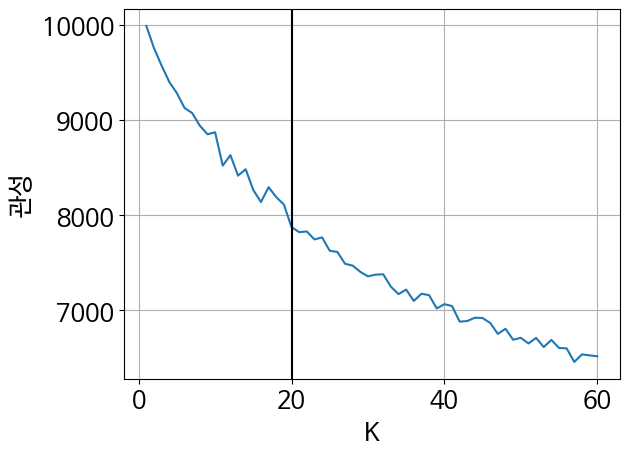

In [56]:
np.random.seed(0)
import matplotlib.pyplot as plt

k_values = range(1, 61)
inertia_values = [MiniBatchKMeans(k).fit(shrunk_norm_matrix).inertia_
               for k in k_values]
plt.plot(k_values, inertia_values)
plt.xlabel('K')
plt.ylabel('관성')
plt.axvline(20, c='k')
plt.grid(True)
plt.show()

## 15-44

In [57]:
np.random.seed(0)
cluster_model = KMeans(n_clusters=20)
clusters = cluster_model.fit_predict(shrunk_norm_matrix)
df = pd.DataFrame({'Index': range(clusters.size), 'Cluster': clusters})

## 15-45

In [59]:
df_car = df[df.Cluster == clusters[0]]
cluster_size = df_car.shape[0]
print(f"0번째 인덱스의 자동차 관련 게시글 포함, "
      f"{cluster_size}개의 게시글이 함께 그룹화 되었습니다")

0번째 인덱스의 자동차 관련 게시글 포함, 406개의 게시글이 함께 그룹화 되었습니다


## 15-46

In [60]:
np.random.seed(1)
def get_post_category(index):
    target_index = newsgroups.target[index]
    return newsgroups.target_names[target_index]

random_index = np.random.choice(df_car.Index.values)
post_category = get_post_category(random_index)

print(f"아래의 게시글은 {post_category} 그룹에 포함되어 있습니다\n")
print(newsgroups.data[random_index].replace('\n\n', '\n'))

아래의 게시글은 rec.autos 그룹에 포함되어 있습니다

In article <1993Apr20.174246.14375@wam.umd.edu> lerxst@wam.umd.edu (where's my  
thing) writes:
> 
>  I was wondering if anyone out there could enlighten me on this car I saw
> the other day. It was a 2-door sports car, looked to be from the late 60s/
> early 70s. It was called a Bricklin. The doors were really small. In  
addition,
> the front bumper was separate from the rest of the body. This is 
> all I know. If anyone can tellme a model name, engine specs, years
> of production, where this car is made, history, or whatever info you
> have on this funky looking car, please e-mail.
Bricklins were manufactured in the 70s with engines from Ford. They are rather  
odd looking with the encased front bumper. There aren't a lot of them around,  
but Hemmings (Motor News) ususally has ten or so listed. Basically, they are a  
performance Ford with new styling slapped on top.
>    ---- brought to you by your neighborhood Lerxst ----
Rush fan?



## 15-47

In [61]:
rec_autos_count = 0
for index in df_car.Index.values:
    if get_post_category(index) == 'rec.autos':
        rec_autos_count += 1

rec_autos_percent = 100 * rec_autos_count / cluster_size
print(f"동일 그룹 내 {rec_autos_percent:.2f}%의 게시글이 "
     "rec.autos 뉴스 그룹에 속합니다")

동일 그룹 내 83.00%의 게시글이 rec.autos 뉴스 그룹에 속합니다


## 15-48

In [62]:
np.random.seed(1)
not_autos_indices = [index for index in df_car.Index.values
                   if get_post_category(index) != 'rec.autos']

random_index = np.random.choice(not_autos_indices)
post_category = get_post_category(random_index)

print(f"아래의 게시글은 {post_category} 그룹에 포함되어 있습니다\n")
print(newsgroups.data[random_index].replace('\n\n', '\n'))

아래의 게시글은 misc.forsale 그룹에 포함되어 있습니다

1976 BMW 530i
The original four door sports sedan

Arctic Blue metallic with gold alloy plus-1 wheels (Rial 15")
Goodyear Eagle GT+4 racing tires (mud/snow-rated)
3.0 liter, 186 HP, fuel injected engine w/Stahl headers
adjustable gas shocks all around (Koni,BYK)
4 speed stick, 4 wheel power disc brakes, sunroof, PS, AC
Listen-Up installed hidden speaker stereo w/subwoofer
208K miles (yet much better condition than most cars w/100K)
Meticulously maintained: all records, 3K mi oil changes
Faded paint on top, otherwise excellent exterior and interior.
The car has required no major repair work in the more than ten years I have
owned it. It has never failed to start or broken down, even in the coldest
weather. This has been an extraordinarily reliable and economical car, and
shows every sign of staying that way. Yet it is an absolute thrill to drive
when you take it to secluded twisty mountain road! I sell it now,
reluctantly, since I just succumbed to t

## 15-49

In [63]:
def rank_words_by_tfidf(indices, word_list=words):
    summed_tfidf = np.asarray(tfidf_matrix[indices].sum(axis=0))[0]
    data = {'Word': word_list,
            'Summed TFIDF': summed_tfidf}
    return pd.DataFrame(data).sort_values('Summed TFIDF', ascending=False)

df_ranked_words = rank_words_by_tfidf(not_autos_indices)
print(df_ranked_words[:10].to_string(index=False))

    Word  Summed TFIDF
     car      8.753346
   radar      2.439239
    cars      2.063944
   radio      2.004262
   speed      1.716273
     ham      1.681461
detector      1.370761
   miles      1.369876
    just      1.359359
     com      1.211464


## 15-50

In [64]:
df_ranked_words = rank_words_by_tfidf(df_car.Index.values)
print(df_ranked_words[:10].to_string(index=False))

   Word  Summed TFIDF
    car     48.768707
   cars     18.196515
 engine     11.130130
 dealer      8.501634
    com      8.039353
   just      7.553283
 writes      7.417410
    edu      7.284253
article      6.869569
   good      6.766003


## 15-51

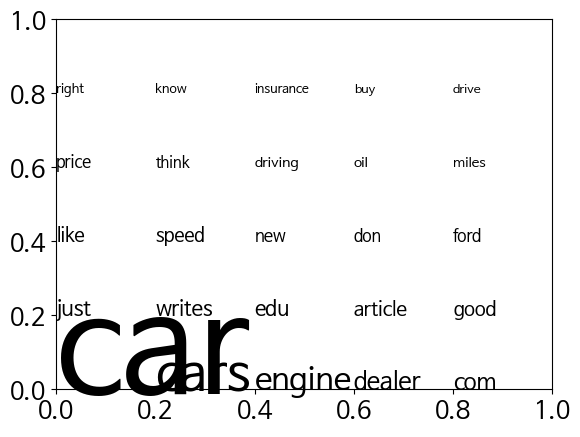

In [65]:
i = 0
for x_coord in np.arange(0, 1, .2):
    for y_coord in np.arange(0, 1, .2):
        word, significance = df_ranked_words.iloc[i].values
        plt.text(y_coord, x_coord, word, fontsize=2*significance)
        i += 1
plt.show()

In [66]:
!pip install wordcloud

## 15-52

In [67]:
from wordcloud import WordCloud
cloud_generator = WordCloud(random_state=1)

## 15-53

In [71]:
words_to_score = {word: score for word, score in df_ranked_words[:10].values}
wordcloud_image = cloud_generator.fit_words(words_to_score)

## 15-54

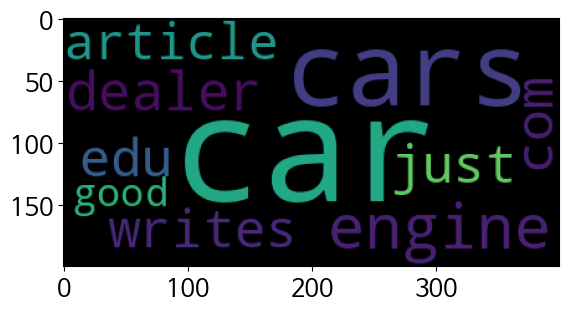

In [72]:
plt.imshow(wordcloud_image)
plt.show()

## 15-55

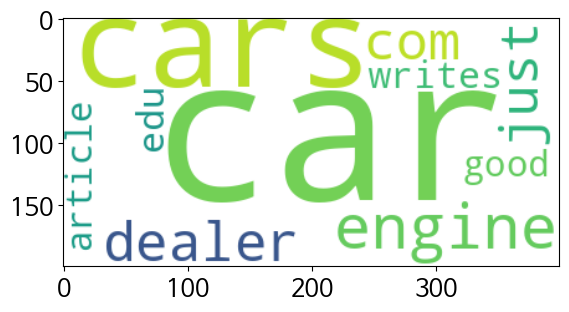

In [73]:
cloud_generator = WordCloud(background_color='white', random_state=1)
wordcloud_image = cloud_generator.fit_words(words_to_score)
plt.imshow(wordcloud_image, interpolation="bilinear")
plt.show()

## 15-56

In [90]:
tfidf_matrix

<11314x114441 sparse matrix of type '<class 'numpy.float64'>'
	with 1024187 stored elements in Compressed Sparse Row format>

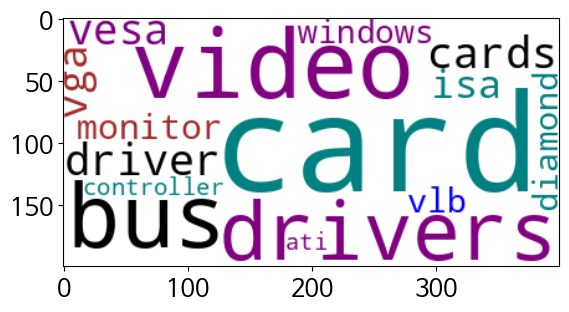

In [105]:
def rank_words_by_tfidf(indices, word_list=words):
    summed_tfidf = np.asarray(tfidf_matrix[indices].sum(axis=0))[0]
    data = {'Word': word_list,
            'Summed TFIDF': summed_tfidf}
    return pd.DataFrame(data).sort_values('Summed TFIDF', ascending=False)

def cluster_to_image(df_cluster, max_words=15, cluster_id=None):
    if cluster_id is not None:
        np.random.seed(cluster_id)  # Seed the random number generator with cluster_id

    indices = df_cluster.Index.values
    df_ranked_words = rank_words_by_tfidf(indices)[:max_words]
    words_to_score = {word: score for word, score in df_ranked_words.values}

    # Create the WordCloud without setting random_state to ensure fresh randomness
    cloud_generator = WordCloud(background_color='white', color_func=_color_func, random_state=1)
    cloud_image = cloud_generator.fit_words(words_to_score)

    return cloud_image

def _color_func(*args, **kwargs):
    # Re-seed randomness inside color_func to make sure color choices change
    np.random.seed()
    return np.random.choice(['black', 'blue', 'teal', 'purple', 'brown'])

# Select a different cluster ID to get a different result
cluster_id = np.random.randint(0, 20)
df_random_cluster = df[df.Cluster == cluster_id]
wordcloud_image = cluster_to_image(df_random_cluster, cluster_id=cluster_id)

plt.imshow(wordcloud_image, interpolation="bilinear")
plt.show()

## 15-57

In [107]:
from collections import Counter

def get_top_category(df_cluster):
    categories = [get_post_category(index) for index in df_cluster.Index.values]
    top_category, _ = Counter(categories).most_common()[0]
    return top_category

top_category = get_top_category(df_random_cluster)
print(f"클러스터내 게시글은 {top_category} 뉴스그룹에 자주 등장합니다")

클러스터내 게시글은 comp.sys.ibm.pc.hardware 뉴스그룹에 자주 등장합니다


## 15-58

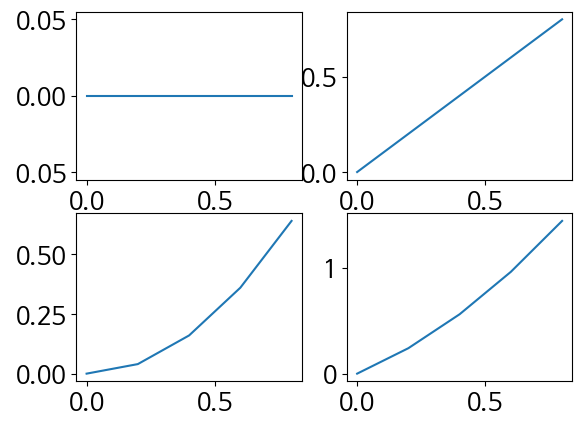

In [108]:
figure, axes = plt.subplots(2, 2)
for r in range(2):
    for c in range(2):
        x = np.arange(0, 1, .2)
        y = r * x * x + c * x
        axes[r][c].plot(x, y)
plt.show()

## 15-59

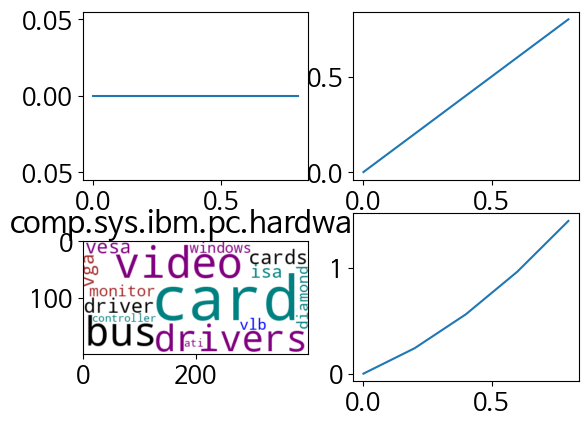

In [109]:
figure, axes = plt.subplots(2, 2)
for r in range(2):
    for c in range(2):
        if (r, c) == (1, 0):
            axes[r][c].set_title(top_category)
            axes[r][c].imshow(wordcloud_image, interpolation="bilinear")
        else:
            x = np.arange(0, 1, .2)
            y = r * x * x + c * x
        axes[r][c].plot(x, y)
plt.show()

## 15-60

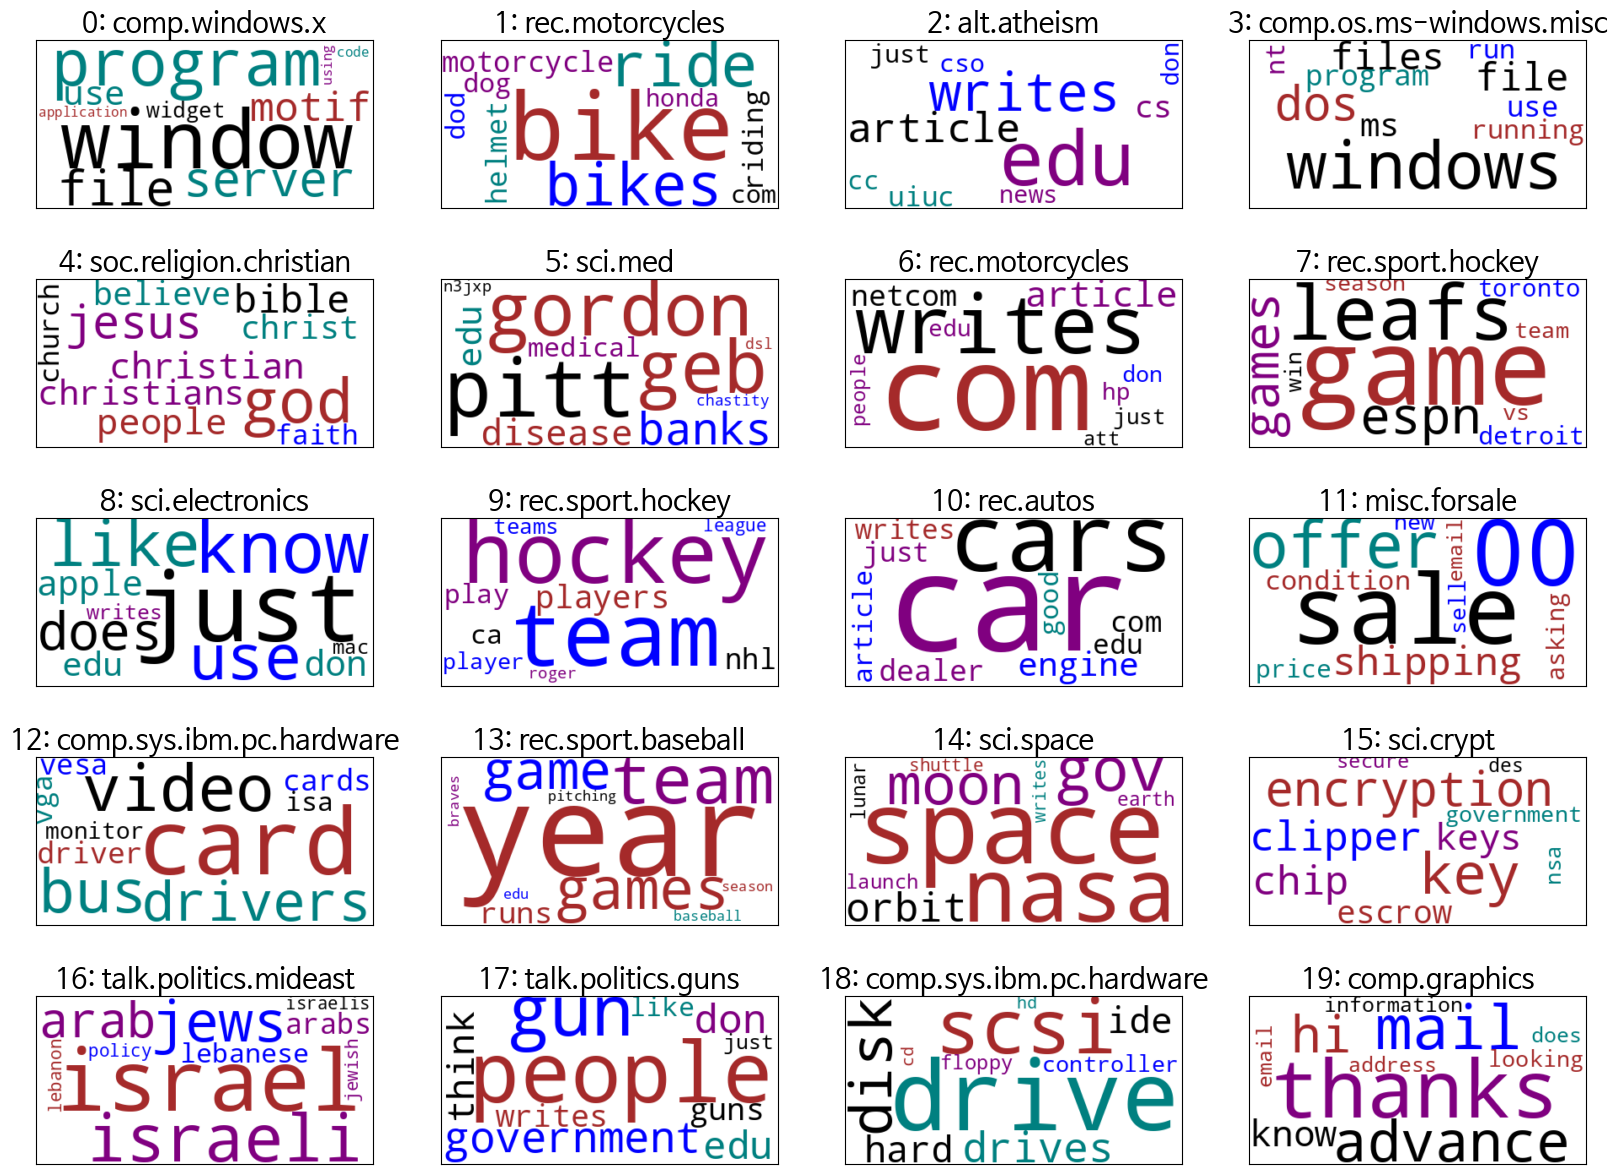

In [110]:
np.random.seed(0)
def get_title(df_cluster):
    top_category = get_top_category(df_cluster)
    cluster_id = df_cluster.Cluster.values[0]
    return f"{cluster_id}: {top_category}"

figure, axes = plt.subplots(5, 4, figsize=(20, 15))
cluster_groups = list(df.groupby('Cluster'))
for r in range(5):
    for c in range(4):
        _, df_cluster = cluster_groups.pop(0)
        wordcloud_image = cluster_to_image(df_cluster, max_words=10)
        ax = axes[r][c]
        ax.imshow(wordcloud_image, interpolation="bilinear")
        ax.set_title(get_title(df_cluster), fontsize=20)
        ax.set_xticks([])
        ax.set_yticks([])
plt.show()

## 15-61

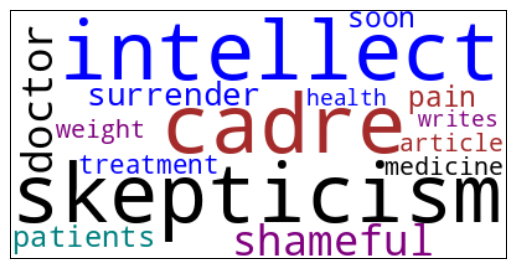

In [117]:
np.random.seed(3)
df_cluster= df[df.Cluster == 5]
df_ranked_words = rank_words_by_tfidf(df_cluster.Index.values)

words_to_score = {word: score for word, score in df_ranked_words[10:25].values}
cloud_generator = WordCloud(background_color='white',
                            color_func=_color_func,
                            random_state=1)
wordcloud_image = cloud_generator.fit_words(words_to_score)
plt.imshow(wordcloud_image, interpolation="bilinear")
# plt.title(get_title(df_cluster), fontsize=20)
plt.xticks([])
plt.yticks([])
plt.show()